In [2]:
import pandas as pd

In [3]:
hr_data1= pd.read_csv(r'C:\Users\HappyPC\Desktop\Datascience\Springboard\Project1_hr_analytics\train_data_hr.csv')

# Let’s explore the data a little bit  before starting in Depth exploration and Visualization starting with looking at top 5 rows

In [138]:
hr_data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### We will take a look at statistical details of the dataset, with use of describe()

In [4]:
hr_data1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### We will take a quick look at data types and missing value with info() 

In [5]:
hr_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
#Find all Columns having NULL values(i.e. Column name with Value TRUE for isna().any() function)
hr_data1.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [7]:
#Find Count of rows with NULL values for each column
hr_data1.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Create a new column for Education with information of which values were NULL before filling them with most frequent value
hr_data1['education_isnull'] = hr_data1['education'].isnull().astype(int)
hr_data1['education_isnull'].value_counts()

0    52399
1     2409
Name: education_isnull, dtype: int64

In [9]:
#Create new column for previous_year_rating with information of which values were NULL before filling them with most frequent value
hr_data1['previous_year_rating_isnull'] = hr_data1['previous_year_rating'].isnull().astype(int)
hr_data1['previous_year_rating_isnull'].value_counts()

0    50684
1     4124
Name: previous_year_rating_isnull, dtype: int64

In [10]:
# Find most frequest value for education and staore in variable most_freq_edu
most_freq_edu = hr_data1['education'].value_counts().sort_values(ascending = False).index[0]
most_freq_edu

"Bachelor's"

In [11]:
#Fill NULL values for education column with most_freq_edu
hr_data1['education']= hr_data1['education'].fillna(most_freq_edu)

In [12]:
# Find most frequest value for previous_year_rating and staore in variable most_freq_pry_rtng
most_freq_pry_rtng = hr_data1['previous_year_rating'].value_counts().sort_values(ascending = False).index[0]
most_freq_pry_rtng

3.0

In [13]:
#Fill NULL values for previous_year_rating column with most_freq_pry_rtng
hr_data1['previous_year_rating']= hr_data1['previous_year_rating'].fillna(most_freq_pry_rtng)

In [14]:
#Confirm we have no column left with NULL values
hr_data1.isnull().sum()

employee_id                    0
department                     0
region                         0
education                      0
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating           0
length_of_service              0
KPIs_met >80%                  0
awards_won?                    0
avg_training_score             0
is_promoted                    0
education_isnull               0
previous_year_rating_isnull    0
dtype: int64

# Data Exploration and Visualization Begins

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

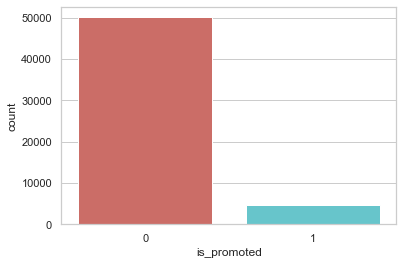

<Figure size 432x288 with 0 Axes>

In [16]:
#Find count of dependent variable is_promoted for each possible outcome i.e. (Binary : 1,0) in dataset
sns.countplot(x ='is_promoted', data = hr_data1, palette = 'hls' )
plt.show()
plt.savefig('count_plot')
#Looking at below graph we have a clear indication of an imbalanced dataset

# Obesrvations for numerical variables

In [17]:
hr_data1.groupby('is_promoted').mean()
# Average age of people promoted is less (Younger) to those who did not.
# Surprisingly More trainings didnt help with promotion as average number of trainings is less for people promoted.
# People who got promoted had better performance ratings last year.
# People who got promoted were also on average were more recent joiners to company then people who did not.
# People who got promoted had better average training score.
# People who got promoted also got more awards.
# More % of people who met the KPIs got promoted
# People with better performance ratings last year had better chance for promotion.

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_isnull,previous_year_rating_isnull
is_promoted,,,,,,,,,,
0,39187.520423,1.257639,34.844037,3.247686,5.879398,0.319685,0.014180,62.647686,0.045612,0.075489
1,39285.092331,1.203299,34.372965,3.914524,5.716367,0.698800,0.119751,71.325193,0.026135,0.072622


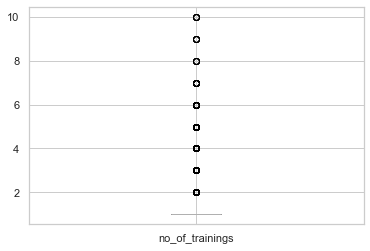

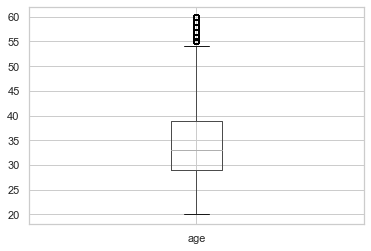

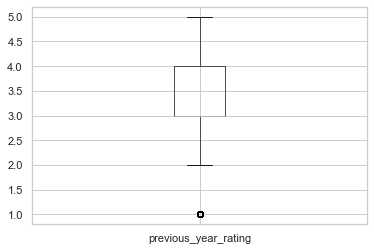

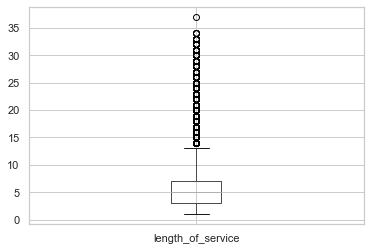

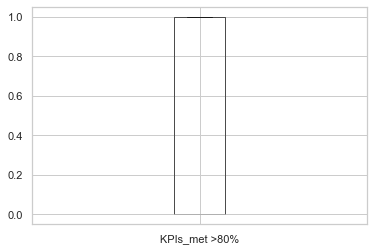

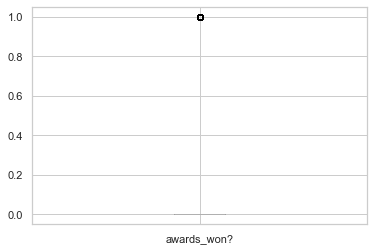

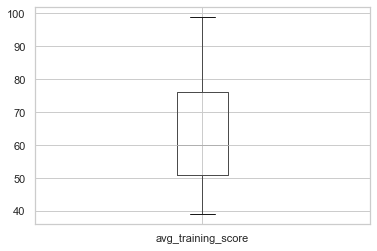

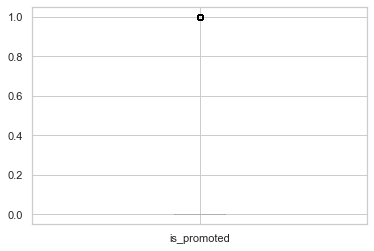

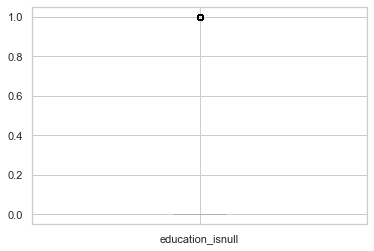

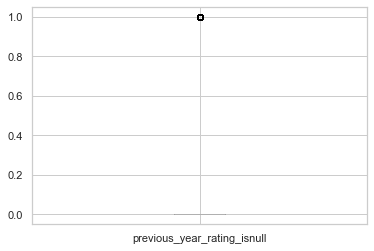

In [18]:
#Observing Outliers
for column in hr_data1:
    if column != 'employee_id' and hr_data1[column].dtype != 'object':
        
        plt.figure()
        hr_data1.boxplot(column)
     
# For number of trainings, its possible some people took more trainings.
# (Maybe people with large value for lenghth of service have more trainings - I will check this hypothesis next)
# For age its very much possible to have employees between 55 - 60 ( As most of companies have retirement age 65)
# Same is true for length of service - very much possible some employees have been for very long

In [19]:
#Check if people with higher lenth of service has more traings 
hr_data1.groupby('no_of_trainings').mean()[['length_of_service']]
#My Hypothesis was not right. It doesnt seem number of trainings is more for people with higher length of service
#

,length_of_service
no_of_trainings,
1,5.986592
2,5.430700
3,5.145270
4,4.912393
5,4.773438
6,5.750000
7,5.333333
8,2.600000
9,2.200000


# Visualizations from Categorical variables

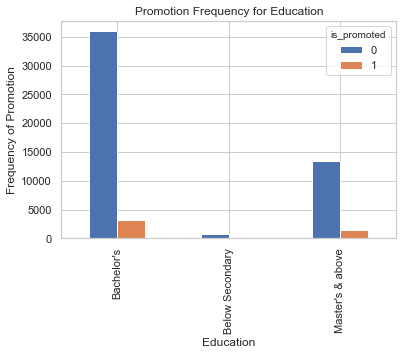

In [20]:
#Visualize how education impacts promotion
pd.crosstab(hr_data1.education,hr_data1.is_promoted).plot(kind='bar')
plt.title('Promotion Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Promotion')
plt.savefig('Promotion_per_Edu')
#Company does seem to hire more of bachelors
#The frequency of promotion does seems to depend a great deal on the Education. 
# I will now look at ratio or promotion to each education to confirm

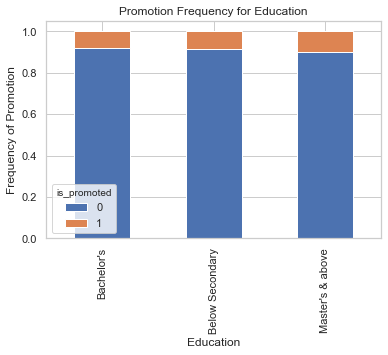

In [21]:
#Visualize how education impacts promotion
table = pd.crosstab(hr_data1.education,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Promotion Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Promotion')
plt.savefig('Promotion_per_Edu')
#The frequency of promotion does not depend a great deal on the Education. 
#Thus Education can not be a good predictor of the outcome variable.

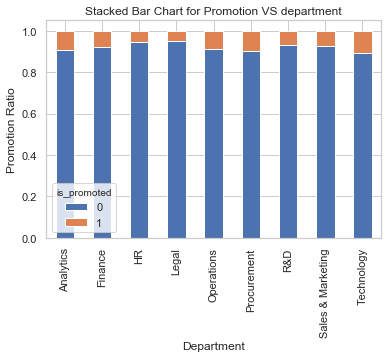

In [22]:
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.department,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Promotion VS department')
plt.xlabel('Department')
plt.ylabel('Promotion Ratio')
plt.savefig('Promotion_per_Dept')

#The promotion depends a great deal on the Department. 
#Thus Department can be a good predictor of the outcome variable.

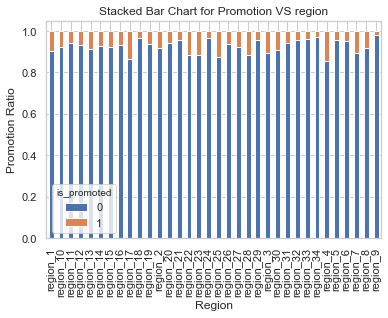

In [23]:
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.region,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Promotion VS region')
plt.xlabel('Region')
plt.ylabel('Promotion Ratio')
plt.savefig('Promotion_per_Regn')

#The promotion depends a great deal on the Region. 
#Thus Region can be a good predictor of the outcome variable.

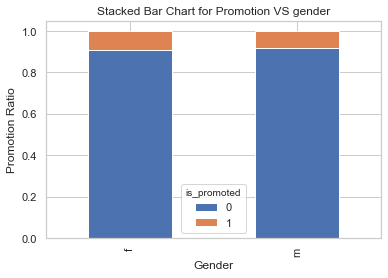

In [24]:
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.gender,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Promotion VS gender')
plt.xlabel('Gender')
plt.ylabel('Promotion Ratio')
plt.savefig('Promotion_per_Gender')

#The promotion doesnt not depend a great deal on the Gender. 
#Thus Gender can't be a good predictor of the outcome variable.

## Machine Learning starts 
## Being a classification problem I will try below machine learning algorithms 
 1. SVC
 2. Random Forest
 3. Logistic regression
 4. KNN
 5. XGBoost

## My Approach

 1. Beeing inbalanced data set Accuracy Score may be misleading
 2. I will have to rate the model performance based on how well it will predict who got promoted 
 3. I will look for Precision/Recall and F1 Score for promoted = 1

### Before we start will perform below data preparation steps:
 1. Perform one hot encoding for categorical variables
 2. store feature matrix and response vector

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
#Doing One hot encoding
hr_data1 = pd.get_dummies(hr_data1, prefix ='DM')
hr_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   employee_id                  54808 non-null  int64  
 1   no_of_trainings              54808 non-null  int64  
 2   age                          54808 non-null  int64  
 3   previous_year_rating         54808 non-null  float64
 4   length_of_service            54808 non-null  int64  
 5   KPIs_met >80%                54808 non-null  int64  
 6   awards_won?                  54808 non-null  int64  
 7   avg_training_score           54808 non-null  int64  
 8   is_promoted                  54808 non-null  int64  
 9   education_isnull             54808 non-null  int32  
 10  previous_year_rating_isnull  54808 non-null  int32  
 11  DM_Analytics                 54808 non-null  uint8  
 12  DM_Finance                   54808 non-null  uint8  
 13  DM_HR           

In [27]:
# store feature matrix in "X"
X = hr_data1.drop(['is_promoted'], axis = 1)
# store response vector in "y"
y = hr_data1['is_promoted']

In [136]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5,stratify=y, shuffle=True)
# show the distribution
print('y_train class distribution')
print(y_train.value_counts(normalize=True))
print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.91483
1    0.08517
Name: is_promoted, dtype: float64
y_test class distribution
0    0.91483
1    0.08517
Name: is_promoted, dtype: float64


In [135]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<b><u>SVC Classification</b></u>

What is SVC : Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane.

Some details on important parameters I will use for tuning

### <b><u>Kernel</b></u>: 
kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane
### <b><u>Gamma</b></u>: 
gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
### <b><u>C</b></u>: 
C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly

In [32]:
# define model and parameters

kernels = ['poly', 'rbf', 'sigmoid']
c_values = [50, 10, 1.0, 0.1]
gammas = [0.1,'scale']


In [33]:
df_svc = pd.DataFrame([{'index':object(), 'precision': float(), 'recall': float(), 'f1-score':float(), 'support':float(),
                            'Model':object(),   'Parameters':object(),'Type':object(), 'Step': int()}])
df_svc = pd.DataFrame([], None, df_svc.columns)
from sklearn.ensemble import BaggingClassifier
i=1
# for loop to iterate for each Parameters
for kernel in kernels :
    for c_value in c_values:
        for gamma in gammas:
            n_estimators = 10
            model = BaggingClassifier(SVC(kernel=kernel,C=c_value,gamma=gamma,class_weight='balanced'),max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1)
            parameter = 'c_value = '+str(c_value)+',gamma='+ str(gamma)+',kernel='+kernel
            model.fit(X_train,y_train)
            y_true, y_pred = y_train, model.predict(X_train)
            report = classification_report(y_true, y_pred, output_dict=True)
            df_svc= df_svc.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='SVC_bagging',Parameters= parameter,Type ='Tr',Step = i),ignore_index=True)
            y_true, y_pred = y_test, model.predict(X_test)
            report = classification_report(y_true, y_pred, output_dict=True)
            df_svc= df_svc.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='SVC_bagging',Parameters= parameter,Type ='Ts',Step = i),ignore_index=True)
            i+=1
            if(i==2 or i ==10 or i ==20 ):
                print('Steps completed :',i)

Steps completed : 2
Steps completed : 10
Steps completed : 20


 ### Lets get the best training and test score for Is_promoted = 1 for SVC model

In [92]:
df_svc.columns = ['item', 'precision', 'recall', 'f1-score', 'support', 'Model','Parameters', 'Type', 'Step']
a=df_svc[(df_svc.item == '1') & (df_svc.Type == 'Ts')]['f1-score'].max()
b = df_svc[df_svc['f1-score'] == a]['Step'].max()
df_svc[(df_svc['Step'] == b) &(df_svc['item'] == '1') ]

,item,precision,recall,f1-score,support,Model,Parameters,Type,Step
131,1,0.272589,0.663146,0.386362,3503.0,SVC_bagging,"c_value = 1.0,gamma=scale,kernel=rbf",Tr,14
136,1,0.263439,0.635193,0.372421,1165.0,SVC_bagging,"c_value = 1.0,gamma=scale,kernel=rbf",Ts,14


In [157]:
df_svc.sort_values('f1-score')[(df_svc.item == '1') & (df_svc.Type == 'Ts')].tail(10)

C:\Users\HappyPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,item,precision,recall,f1-score,support,Model,Parameters,Type,Step
236,1,0.190947,0.796567,0.308050,1165.0,SVC_bagging,"c_value = 0.1,gamma=scale,kernel=sigmoid",Ts,24
176,1,0.202564,0.759657,0.319841,1165.0,SVC_bagging,"c_value = 50,gamma=scale,kernel=sigmoid",Ts,18
66,1,0.413102,0.265236,0.323053,1165.0,SVC_bagging,"c_value = 0.1,gamma=0.1,kernel=poly",Ts,7
156,1,0.214501,0.672961,0.325311,1165.0,SVC_bagging,"c_value = 0.1,gamma=scale,kernel=rbf",Ts,16
56,1,0.265185,0.460944,0.336677,1165.0,SVC_bagging,"c_value = 1.0,gamma=scale,kernel=poly",Ts,6
216,1,0.211859,0.861803,0.340108,1165.0,SVC_bagging,"c_value = 1.0,gamma=scale,kernel=sigmoid",Ts,22
196,1,0.222140,0.776824,0.345486,1165.0,SVC_bagging,"c_value = 10,gamma=scale,kernel=sigmoid",Ts,20
96,1,0.575188,0.262661,0.360636,1165.0,SVC_bagging,"c_value = 50,gamma=scale,kernel=rbf",Ts,10
116,1,0.374539,0.348498,0.361049,1165.0,SVC_bagging,"c_value = 10,gamma=scale,kernel=rbf",Ts,12
136,1,0.263439,0.635193,0.372421,1165.0,SVC_bagging,"c_value = 1.0,gamma=scale,kernel=rbf",Ts,14


#### <font color='red'><u>With a score F-Score of 37% I do not find this as a suitable model to predict if someone should be promoted or not. 
#### We will now see how does RandomForrest perform

<b><u>RandomForrest Classification</b></u>

What is RandomForest : Random Forest is a learning method that operates by constructing multiple decision trees. The final decision is made based on the majority of the trees and is chosen by the random forest

Some details on important parameters I will use for tuning

### <b><u>n_estimators</b></u>: 
The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
### <b><u>max_depth</b></u>: 
The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
### <b><u>min_samples_split</b></u>: 
The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.
### <b><u>max_features</b></u>: 
The number of features to consider when looking for the best split:

In [67]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt','log2']
# max depth
max_depths = [int(x) for x in np.linspace(100, 500, num = 10)]
#min_samples_split
min_samples_splits = [3, 5, 10]

In [68]:
df_rf = pd.DataFrame([{'index':object(), 'precision': float(), 'recall': float(), 'f1-score':float(), 'support':float(),
                            'Model':object(),   'Parameters':object(),'Type':object(), 'Step': int()}])
df_rf = pd.DataFrame([], None, df_rf.columns)
i=1
# for loop to iterate for each leaf size
for n_estimator in n_estimators :
    for max_feature in max_features:
        for max_depth in max_depths:
            for min_samples_split in min_samples_splits:
                model = RandomForestClassifier(n_estimators = n_estimator, max_features = max_feature,
                                   max_depth=max_depth,
                                  n_jobs = -1,class_weight='balanced',
                                  random_state =50)
                parameter = 'n_estimators = '+str(n_estimator)+',max_features='+ max_feature+',max_depth='+ str(max_depth)+',min_samples_split='+str(min_samples_split)
                model.fit(X_train,y_train)
                y_true, y_pred = y_train, model.predict(X_train)
                report = classification_report(y_true, y_pred, output_dict=True)
                df_rf= df_rf.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='RandomForest',Parameters= parameter,Type ='Tr',Step = i),ignore_index=True)
                y_true, y_pred = y_test, model.predict(X_test)
                report = classification_report(y_true, y_pred, output_dict=True)
                df_rf= df_rf.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='RandomForest',Parameters= parameter,Type ='Ts',Step = i),ignore_index=True)
                i+=1
            

In [90]:
df_rf.columns = ['item', 'precision', 'recall', 'f1-score', 'support', 'Model','Parameters', 'Type', 'Step']
a=df_rf[(df_rf.item == '1') & (df_rf.Type == 'Ts')]['f1-score'].max()
b = df_rf[df_rf['f1-score'] == a]['Step'].max()
df_rf[(df_rf['Step'] == b) &(df_rf['item'] == '1') ]


,item,precision,recall,f1-score,support,Model,Parameters,Type,Step
5991,1,1.000000,1.000000,1.000000,3503.0,RandomForest,"n_estimators = 1400,max_features=sqrt,max_dept...",Tr,600
5996,1,0.926254,0.269528,0.417553,1165.0,RandomForest,"n_estimators = 1400,max_features=sqrt,max_dept...",Ts,600


#### <font color='red'><u>With a score F-Score of 41% I do find RandomForest a slightly better model to SVC
### But it seems model is not generalizing well and has overfitting issues.
#### We will now see how does RandomForrest perform

### <b><u>Logistic regression</b></u>

What is Logistic regression : Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis and is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Some details on important parameters I will use for tuning

### <b><u>Penalty:</b></u>
This hyper-parameter is used to specify the type of normalization used.  Few of the values for this hyper-parameter can be l1, l2 or none. The default value is l2.
### <b><u>Inverse of regularization(C):</b></u> 
This hyper-parameter is denoted as C. Smaller values of this hyper-parameter indicates a stronger regularization. Default value is 1.0
### <b><u>Solver:</b></u> 
This indicates which algorithm to use in the optimization problem. Default value is lbfgs. other possible values are newton-cg, liblinear, sag, saga.

In [30]:
## define models and parameters

penalties = ['l1', 'l2']
c_values = [0.01, 0.1, 1, 10, 100, 1000]
solvers = ['liblinear', 'saga']

In [31]:
df_lg = pd.DataFrame([{'index':object(), 'precision': float(), 'recall': float(), 'f1-score':float(), 'support':float(),
                            'Model':object(),   'Parameters':object(),'Type':object(), 'Step': int()}])
df_lg = pd.DataFrame([], None, df_lg.columns)
i=1
# for loop to iterate for each leaf size
for solver in solvers :
    for penalty in penalties:
        for c_value in c_values:
            model = LogisticRegression(solver=solver,penalty=penalty,C=c_value,multi_class='ovr',class_weight='balanced')
            parameter = 'c_value = '+str(c_value)+',solver='+ solver+',penalty='+penalty
            model.fit(X_train,y_train)
            y_true, y_pred = y_train, model.predict(X_train)
            report = classification_report(y_true, y_pred, output_dict=True)
            df_lg= df_lg.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='LogisticR',Parameters= parameter,Type ='Tr',Step = i),ignore_index=True)
            y_true, y_pred = y_test, model.predict(X_test)
            report = classification_report(y_true, y_pred, output_dict=True)
            df_lg= df_lg.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='LogisticR',Parameters= parameter,Type ='Ts',Step = i),ignore_index=True)
            i+=1
            

C:\Users\HappyPC\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 ### Lets get the best training and test score for Is_promoted = 1 for Logestic regression model

In [91]:
df_lg.columns = ['item', 'precision', 'recall', 'f1-score', 'support', 'Model','Parameters', 'Type', 'Step']
a=df_lg[(df_lg.item == '1')  & (df_lg.Type == 'Ts')]['f1-score'].max()
b = df_lg[df_lg['f1-score'] == a]['Step'].max()
df_lg[(df_lg['Step'] == b) &(df_lg['item'] == '1') ]

,item,precision,recall,f1-score,support,Model,Parameters,Type,Step
71,1,0.243419,0.821011,0.375506,3503.0,LogisticR,"c_value = 0.1,solver=liblinear,penalty=l2",Tr,8
76,1,0.247579,0.812017,0.379462,1165.0,LogisticR,"c_value = 0.1,solver=liblinear,penalty=l2",Ts,8


### <u>Now we will try to  visualise the coefficients that have the largest positive and negative impact on the probability of getting promoted 

In [146]:
#Get Coefficient vlues 
model_lg = LogisticRegression(C = 0.1,solver='liblinear',penalty='l2',multi_class='ovr',class_weight='balanced')
model_lg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

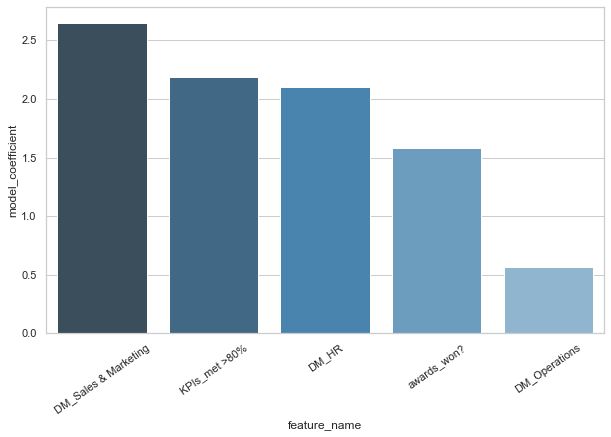

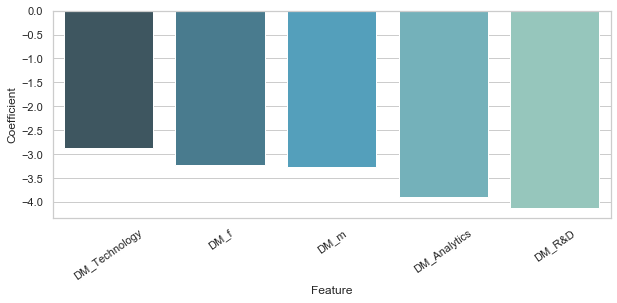

In [147]:
 # Get the models coefficients (and top 5 and bottom 5)
full_col_names = list(X_train.columns.values)
logReg_coeff = pd.DataFrame({'feature_name': full_col_names, 'model_coefficient': model_lg.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff_top = logReg_coeff.head(5)
logReg_coeff_bottom = logReg_coeff.tail(5)
# Plot top 5 coefficients
plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=logReg_coeff_top.feature_name)
# Plot bottom 5 coefficients
plt.figure().set_size_inches(10,6)
fg4 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_bottom, palette="GnBu_d")
fg4.set_xticklabels(rotation=35, labels=logReg_coeff_bottom.feature_name)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)
plt.savefig('figure_4.png')

    ### We can see from these graphs that the odds are brightest for people who are in Sales & Marketing department and have have met KPI>80 %

    ### Also if you work with R&D or Analytics department, it negatively impacts your promotion.

    ### I will advice my client on looking into these disparities based on department

## <u>Model Performance analysis
#### <font color='red'><u>With a score F-Score of 37% I do not find this as a suitable model to predict if someone should be promoted or not. 
#### Model seems to be generalizing well though, as F-Score of Test and Train set are almost similar
#### We will now see how does KNN perform

### <b><u>KNN</b></u>

What is KNN : The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

Some details on important parameters I will use for tuning

### <b><u>n_neighbors:</b></u>
Number of neighboring samples to use for imputation. Default value is 5
### <b><u>Metric:</b></u> 
Distance metric for searching neighbors.Default value ’nan_euclidean’
### <b><u>weights:</b></u> 
Weight function used in prediction.Default value is ’uniform’

In [71]:
from sklearn.neighbors import KNeighborsClassifier
# define parameters

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan', 'minkowski']


In [73]:
df_knn = pd.DataFrame([{'index':object(), 'precision': float(), 'recall': float(), 'f1-score':float(), 'support':float(),
                            'Model':object(),   'Parameters':object(),'Type':object(), 'Step': int()}])
df_knn = pd.DataFrame([], None, df_lg.columns)
i=1
# for loop to iterate for each leaf size
for n_neighbor in n_neighbors :
    for weight in weights:
        for metric in metrics:
            model = KNeighborsClassifier(n_neighbors=n_neighbor,weights=weight,metric=metric,n_jobs = -1)
            parameter = 'n_neighbors = '+str(n_neighbor)+',weights='+ weight+',metrics='+metric
            model.fit(X_train,y_train)
            y_true, y_pred = y_train, model.predict(X_train)
            report = classification_report(y_true, y_pred, output_dict=True)
            df_knn= df_knn.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='KNN',Parameters= parameter,Type ='Tr',Step = i),ignore_index=True)
            y_true, y_pred = y_test, model.predict(X_test)
            report = classification_report(y_true, y_pred, output_dict=True)
            df_knn= df_knn.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='KNN',Parameters= parameter,Type ='Ts',Step = i),ignore_index=True)
            i+=1
            

In [140]:
#df_knn =df_knn[['index', 'precision', 'recall', 'f1-score', 'support', 'Model', 'Parameters', 'Type', 'Step']]

df_knn.columns = ['item', 'precision', 'recall', 'f1-score', 'support', 'Model','Parameters', 'Type', 'Step']
a=df_knn[(df_knn.item == '1') & (df_knn.Type == 'Ts')]['f1-score'].max()
b = df_knn[df_knn['f1-score'] == a]['Step'].max()
df_knn[(df_knn['Step'] == b) &(df_knn['item'] == '1') ]

,item,precision,recall,f1-score,support,Model,Parameters,Type,Step
51,1,1.000000,1.00000,1.000000,3503.0,KNN,"n_neighbors = 1,weights=distance,metrics=minko...",Tr,6
56,1,0.276356,0.23176,0.252101,1165.0,KNN,"n_neighbors = 1,weights=distance,metrics=minko...",Ts,6


#### <font color='red'><u>With a score F-Score of 25% and with model not generalizing well(Has Overfitting issue) I will reject this model

### <u>Last model I will give a try is XGboost,considering its popularity in Kaggle competetions

### <b><u>XGboost</b></u>

What is XGboost : XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

Some details on important parameters I will use for tuning

### <b><u>max_depths:</b></u> 
The maximum depth of a tree and used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
### <b><u>min_child_weights:</b></u> 
Defines the minimum sum of weights of all observations required in a child
### <b><u>gammas:</b></u> 
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
### <b><u>colsample_bytrees:</b></u> 
 Denotes the fraction of columns to be randomly samples for each tree.
### <b><u>learning_rates:</b></u>
Makes the model more robust by shrinking the weights on each step

In [110]:
from xgboost import XGBClassifier
learning_rates = [0.05, 0.10, 0.15 ] 
max_depths   = [ 3, 4, 5]
min_child_weights = [ 1, 3, 5 ]
gammas = [ 0.0, 0.1, 0.2 ]
colsample_bytrees = [ 0.3, 0.4, 0.5]

In [111]:
df_xgb = pd.DataFrame([{'item':object(), 'precision': float(), 'recall': float(), 'f1-score':float(), 'support':float(),
                            'Model':object(),   'Parameters':object(),'Type':object(), 'Step': int()}])
df_xgb = pd.DataFrame([], None, df_lg.columns)
i=1
for learning_rate in learning_rates:
    for max_depth in max_depths:
        for min_child_weight in min_child_weights:
            for gamma in gammas:
                for colsample_bytree in colsample_bytrees:
                    model = XGBClassifier(learning_rate=learning_rate, n_estimators=200, max_depth=max_depth, min_child_weight=min_child_weight, gamma=gamma,nthread=4,seed=29)
                    parameter = 'learning_rate = '+str(learning_rate)+',max_depth='+ str(max_depth)+',min_child_weight='+str(min_child_weight)+',gamma='+str(gamma)+',colsample_bytree='+str(colsample_bytree)
                    model.fit(X_train,y_train)
                    y_true, y_pred = y_train, model.predict(X_train)
                    report = classification_report(y_true, y_pred, output_dict=True)
                    df_xgb= df_xgb.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='xgb',Parameters= parameter,Type ='Tr',Step = i),ignore_index=True)
                    y_true, y_pred = y_test, model.predict(X_test)
                    report = classification_report(y_true, y_pred, output_dict=True)
                    df_xgb= df_xgb.append(pd.DataFrame(report).transpose().reset_index().assign(Model ='xgb',Parameters= parameter,Type ='Ts',Step = i),ignore_index=True)
                    i+=1
                    

In [120]:
df_xgb =df_xgb[['index', 'precision', 'recall', 'f1-score', 'support', 'Model','Parameters', 'Type', 'Step']]

In [149]:
pd.set_option('display.max_colwidth', -1)
df_xgb.columns = ['item', 'precision', 'recall', 'f1-score', 'support', 'Model','Parameters', 'Type', 'Step']
a=df_xgb[(df_xgb.item == '1') & (df_xgb.Type == 'Ts')]['f1-score'].max()
b = df_xgb[df_xgb['f1-score'] == a]['Step'].max()
pd.options.display.max_columns = None
from xgboost import XGBClassifier
from xgboost import plot_importancedf_xgb[(df_xgb['Step'] == b) &(df_xgb['item'] == '1') ]

C:\Users\HappyPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,item,precision,recall,f1-score,support,Model,Parameters,Type,Step
2211,1,0.985465,0.387097,0.555852,3503.0,xgb,"learning_rate = 0.15,max_depth=5,min_child_weight=1,gamma=0.1,colsample_bytree=0.5",Tr,222
2216,1,0.945238,0.340773,0.500946,1165.0,xgb,"learning_rate = 0.15,max_depth=5,min_child_weight=1,gamma=0.1,colsample_bytree=0.5",Ts,222


#### <font color='red'><u>With a score F-Score of 50% XGBBoost seems to be the best Model I have

## <u>Now we will try to  visualise the feature importatnce graph to find out what impacts the most in deciding if someone gets promoted or not.

### We will also check if the same matches to what we noticed in Logistic regression

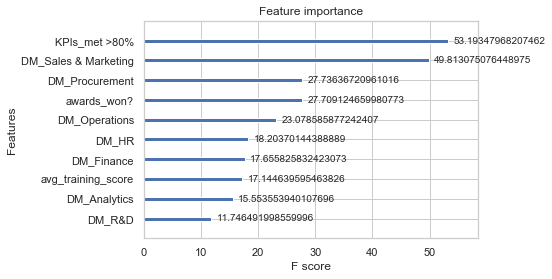

In [162]:
from xgboost import XGBClassifier
from xgboost import plot_importance
## build the model with parameter values giving best results.
model_XGB = XGBClassifier(learning_rate=0.15, n_estimators=200, max_depth=5, min_child_weight=1, gamma=0.1,nthread=4,seed=29)
model_XGB.fit(X_train,y_train)
#Plot feature importatnce graph
# Chose importance_Type = 'gain', the default of 'weight' wont give right results 
plot_importance(model_XGB,max_num_features= 10,importance_type='gain')

### We can see from these graphs that very much similar to Logistic regression odds are brightest for people who are in Sales & Marketing department and have have met KPI>80 %

# <u><b>CONCLUSION</u></b>

### <u><b>Best Model</u></b>: 
XGBoost
### <u><b>Best Parameters</u></b>: 
learning_rate = 0.15,max_depth=5,min_child_wei...
### <u><b>Who are most like to get promoted</u></b>: 
People working in Sales and Marketing department and/or have met KPI>80 are more likely to get promoted

# <u><b>Future Work</u></b>

With above conclusions I will end my model building process. We always have rooms for improvement 
and I will always love if someone ( Or me in near future) may be able try few of below and check 
if we can make this odel perfrm even better

1. Try each of below with my features and check if it helps:

        a. np.log(X)
        b. np.exp()
        c. np.sqrt()
        d. X1**
        e. X1***
        f. X1*X2(Mutiply most impacting features)